In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

![](http://www.google.com/url?sa=i&url=http%3A%2F%2Fjoyreactor.com%2Ftag%2Fgif%2Fbest%2F450&psig=AOvVaw0viirU0t1DG_QCEVFfZk4W&ust=1616887773681000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCIjVmL2Oz-8CFQAAAAAdAAAAABAW)

![](http://https://www.google.com/url?sa=i&url=http%3A%2F%2Fjoyreactor.com%2Ftag%2Fgif%2Fbest%2F450&psig=AOvVaw0viirU0t1DG_QCEVFfZk4W&ust=1616887773681000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCIjVmL2Oz-8CFQAAAAAdAAAAABAW)

In [3]:
emissions = pd.read_csv('co2.csv')
emissions.head()

Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                              5.8                               5.9   
3                              9.1                              11.1   
4                              8.7                              10.6   

   Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                           33                  196  
1                           29                  221  
2                           48                  136  
3                           25                  255  
4                           27                  244

# DATASET DESCRIPTION
This dataset captures the details of how CO2 emissions by a vehicle can vary with the different features. The columns of this dataset are 
1. Model
2. Make	
3. Engine Size(L)	
4. Cylinders
5. Fuel Type
6. Fuel Consumption City (L/100 km)
7. Fuel Consumption Hwy (L/100 km)	
8. Fuel Consumption Comb (mpg and L/100 km)
9. Vehicle class
10. Transmission

# Columns

In [4]:
emissions.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

# Rename columns as there are many gaps, which creates un-necessary errors

In [5]:
renamed_col = {
    'Vehicle Class': 'vehicle_class',
    'Engine Size(L)': 'engine_size',
    'Fuel Type': 'fuel_type',
    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
    'Fuel Consumption Comb (mpg)': 'mpgfuel_cons_comb',
    'CO2 Emissions(g/km)': 'co2'
}
emissions.rename(renamed_col, axis='columns', inplace=True)

In [6]:
emissions.keys()

Index(['Make', 'Model', 'vehicle_class', 'engine_size', 'Cylinders',
       'Transmission', 'fuel_type', 'fuel_cons_city', 'fuel_cons_hwy',
       'fuel_cons_comb', 'mpgfuel_cons_comb', 'co2'],
      dtype='object')

# Data-analysis

In [7]:
emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               7385 non-null   object 
 1   Model              7385 non-null   object 
 2   vehicle_class      7385 non-null   object 
 3   engine_size        7385 non-null   float64
 4   Cylinders          7385 non-null   int64  
 5   Transmission       7385 non-null   object 
 6   fuel_type          7385 non-null   object 
 7   fuel_cons_city     7385 non-null   float64
 8   fuel_cons_hwy      7385 non-null   float64
 9   fuel_cons_comb     7385 non-null   float64
 10  mpgfuel_cons_comb  7385 non-null   int64  
 11  co2                7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 692.5+ KB


**Lookss like there are no missing values and the data-types are appropriate** :D 
The dataset contains 7385 observations with 12 columns, with data-types float,int and object.

In [8]:
emissions.describe().transpose()

count        mean        std   min    25%    50%    75%  \
engine_size        7385.0    3.160068   1.354170   0.9    2.0    3.0    3.7   
Cylinders          7385.0    5.615030   1.828307   3.0    4.0    6.0    6.0   
fuel_cons_city     7385.0   12.556534   3.500274   4.2   10.1   12.1   14.6   
fuel_cons_hwy      7385.0    9.041706   2.224456   4.0    7.5    8.7   10.2   
fuel_cons_comb     7385.0   10.975071   2.892506   4.1    8.9   10.6   12.6   
mpgfuel_cons_comb  7385.0   27.481652   7.231879  11.0   22.0   27.0   32.0   
co2                7385.0  250.584699  58.512679  96.0  208.0  246.0  288.0   

                     max  
engine_size          8.4  
Cylinders           16.0  
fuel_cons_city      30.6  
fuel_cons_hwy       20.6  
fuel_cons_comb      26.1  
mpgfuel_cons_comb   69.0  
co2                522.0

# EDA
*We will explore the features by statistical distributions to find any outliers or skewness.From the EDA, we get to know which features will be relevant in the predictions of the target variable and thus we can stop considering less relevant features*                                                                
**EDA let's you get to know about your dataset. So, try as much explorations which will result in better assumptions in creating the model**

# Import lib for visualisations


In [9]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

from plotly import express as px, graph_objects as go
from plotly.subplots import make_subplots

# Why not start with the 1st column 'Make'

In [10]:
emissions.Make.unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

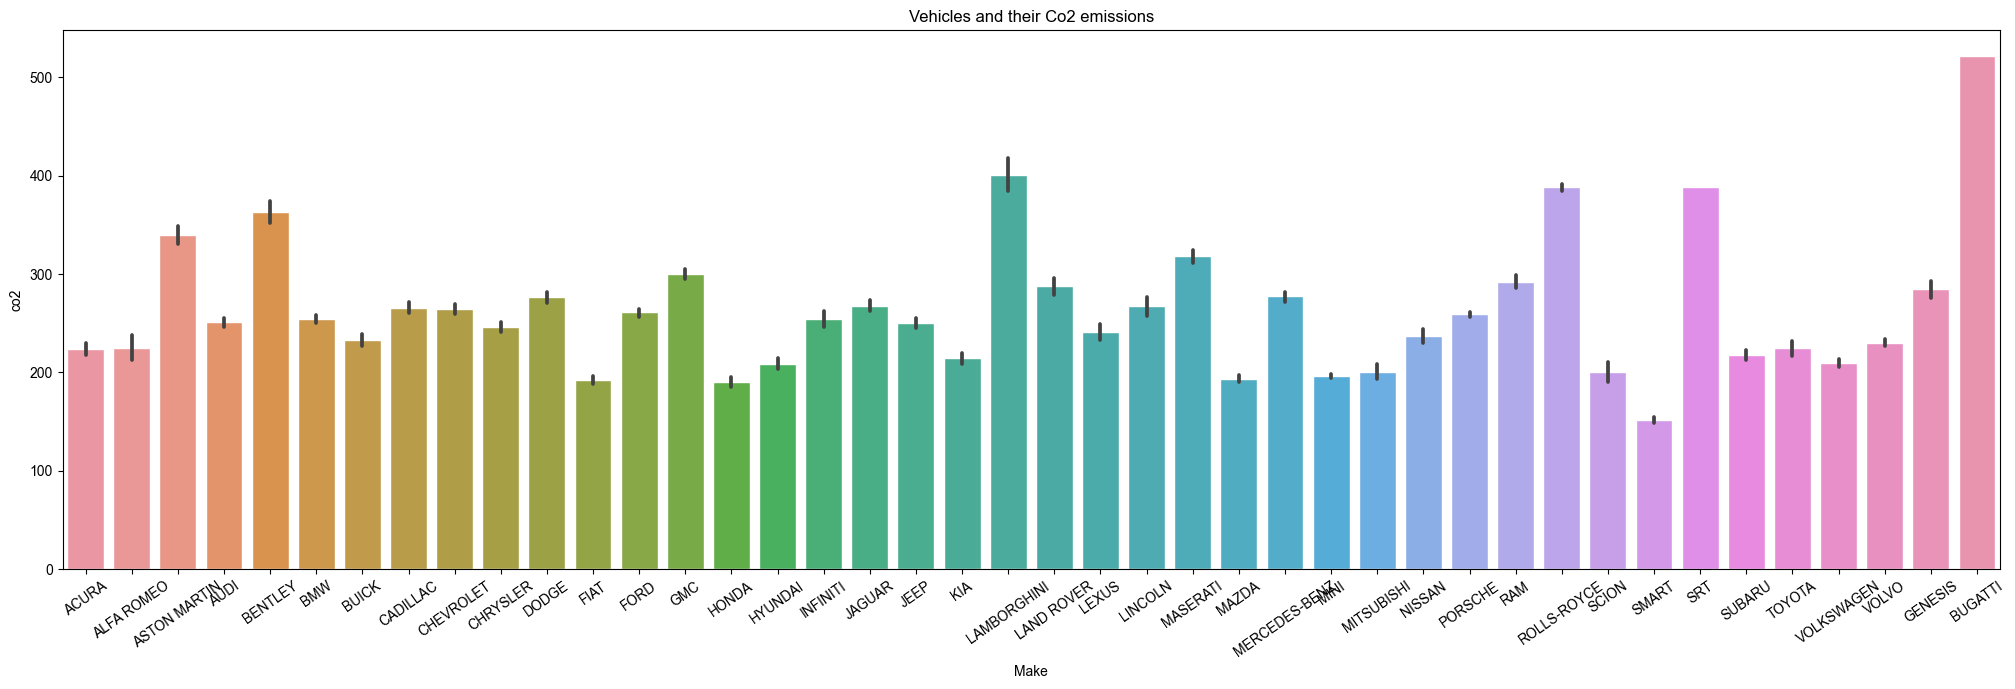

In [11]:
f, ax = plt.subplots(figsize=(25,7))
sns.set_theme(style="darkgrid")

x = emissions.Make.value_counts().sort_values()

ax = sns.barplot(data=emissions,x='Make',y='co2')
plt.title('Vehicles and their Co2 emissions')
plt.xticks(rotation=35)
plt.show()

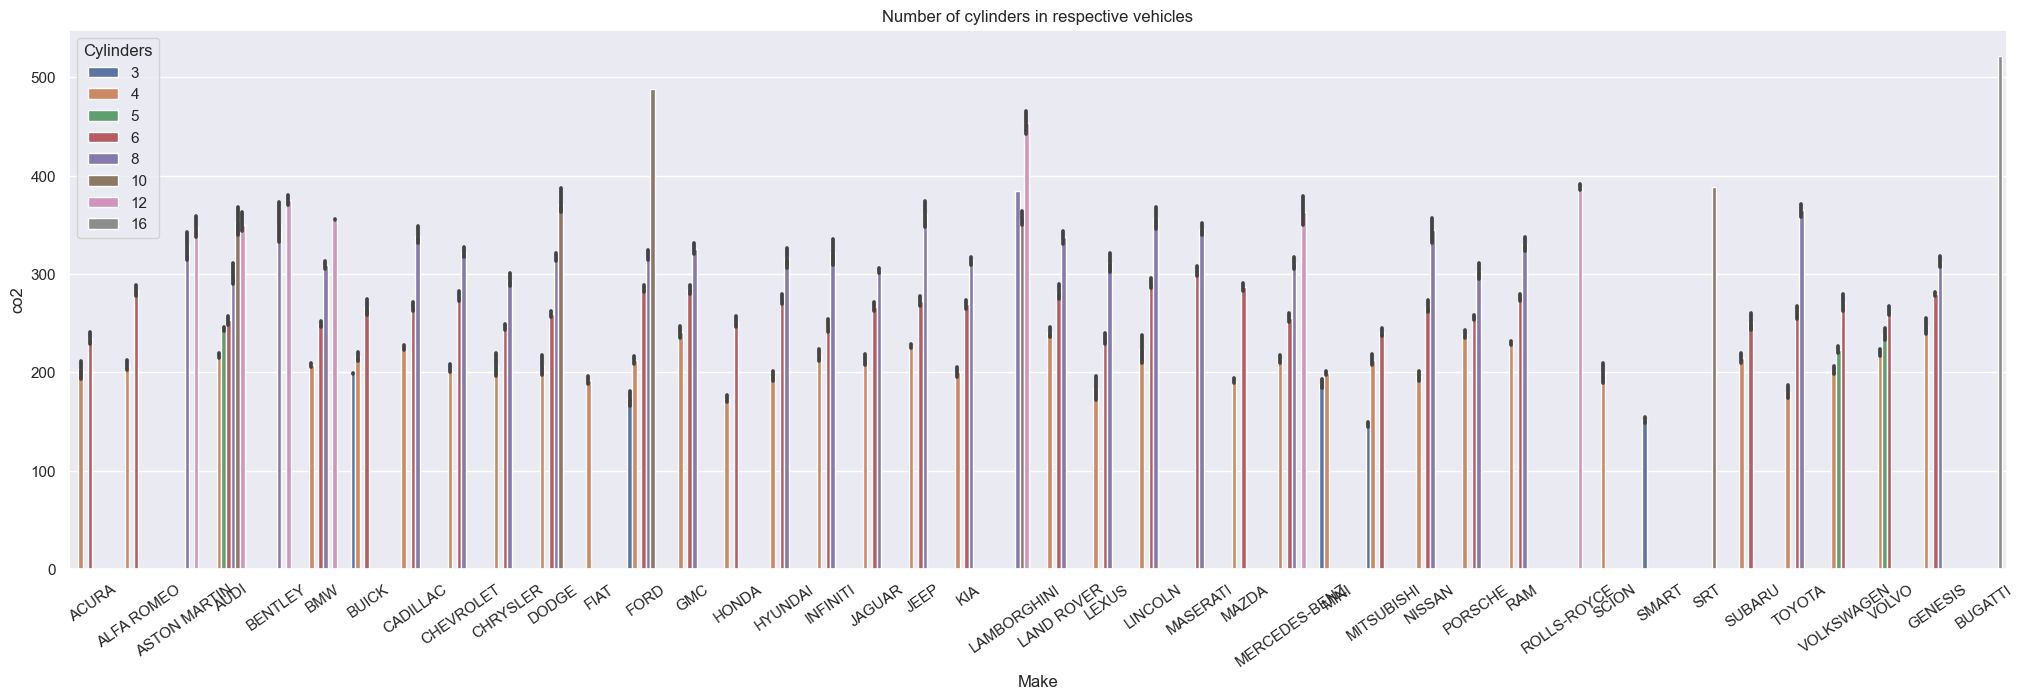

In [13]:
f, ax = plt.subplots(figsize=(25,7))
sns.set_theme(style="darkgrid")

x = emissions.Make.value_counts().sort_values()

ax = sns.barplot(data=emissions,x='Make',y='co2', hue='Cylinders')
plt.title('Number of cylinders in respective vehicles')
plt.xticks(rotation=35)
plt.show()

# Interesting, highest co2 emitter Bugetti seems to have maximum num of cylinders - 16.. We will see how these variables correlate

**Bugatti has highest co2 emissions more than 500 while SMART seems to have lwest of 150**

# Copy our dataframe to a new variable

In [14]:
df = emissions.copy()

renamed_col = {
    'Vehicle Class': 'vehicle_class',
    'Engine Size(L)': 'engine_size',
    'Fuel Type': 'fuel_type',
    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
    'Fuel Consumption Comb (mpg)': 'mpgfuel_cons_comb',
    'CO2 Emissions(g/km)': 'co2'
}
df.rename(renamed_col, axis='columns', inplace=True)

# Retrieve the maximum co2 emissions and their make

In [15]:
df[df.co2 == df.co2.max()]

Make   Model vehicle_class  engine_size  Cylinders Transmission  \
4509  BUGATTI  CHIRON    TWO-SEATER          8.0         16          AM7   
5575  BUGATTI  Chiron    TWO-SEATER          8.0         16          AM7   
6640  BUGATTI  Chiron    TWO-SEATER          8.0         16          AM7   

     fuel_type  fuel_cons_city  fuel_cons_hwy  fuel_cons_comb  \
4509         Z            26.8           16.6            22.2   
5575         Z            26.8           16.6            22.2   
6640         Z            26.8           16.6            22.2   

      mpgfuel_cons_comb  co2  
4509                 13  522  
5575                 13  522  
6640                 13  522

In [16]:
df[df.Make == 'SMART']

Make             Model vehicle_class  engine_size  Cylinders  \
943   SMART  FORTWO CABRIOLET    TWO-SEATER          1.0          3   
944   SMART      FORTWO COUPE    TWO-SEATER          1.0          3   
2072  SMART  FORTWO CABRIOLET    TWO-SEATER          1.0          3   
2073  SMART      FORTWO COUPE    TWO-SEATER          1.0          3   
3189  SMART  FORTWO CABRIOLET    TWO-SEATER          0.9          3   
3190  SMART      FORTWO COUPE    TWO-SEATER          0.9          3   
4255  SMART  FORTWO CABRIOLET    TWO-SEATER          0.9          3   

     Transmission fuel_type  fuel_cons_city  fuel_cons_hwy  fuel_cons_comb  \
943           AM5         Z             6.9            5.7             6.4   
944           AM5         Z             6.9            5.7             6.4   
2072          AM5         Z             6.8            6.2             6.5   
2073          AM5         Z             6.8            6.2             6.5   
3189          AM6         Z             7.5            6.1             6.9   
3190          AM6         Z             7.5            6.1             6.9   
4255          AM6         Z             7.0            6.3             6.7   

      mpgfuel_cons_comb  co2  
943                  44  147  
944                  44  147  
2072                 43  150  
2073                 43  150  
3189                 41  157  
3190                 41  157  
4255                 42  152

In [17]:
fig = px.histogram(df, x="Cylinders")
fig.update_layout(title_text='Cylinders in Vehicles',xaxis_title="Cylinders ",yaxis_title="Number_of_vehicles ",title_x=0.5)
fig.show()

In [18]:
df.Cylinders.value_counts(normalize=True)

4     0.436019
6     0.331212
8     0.189844
12    0.020447
3     0.012864
10    0.005687
5     0.003521
16    0.000406
Name: Cylinders, dtype: float64

In [19]:
df.Cylinders.value_counts()

4     3220
6     2446
8     1402
12     151
3       95
10      42
5       26
16       3
Name: Cylinders, dtype: int64

# 43.5% of the vehicles have 4 cylinders followed by 6 cylinders and 8. Only 3  vehicles have highest number of cylinders - 16

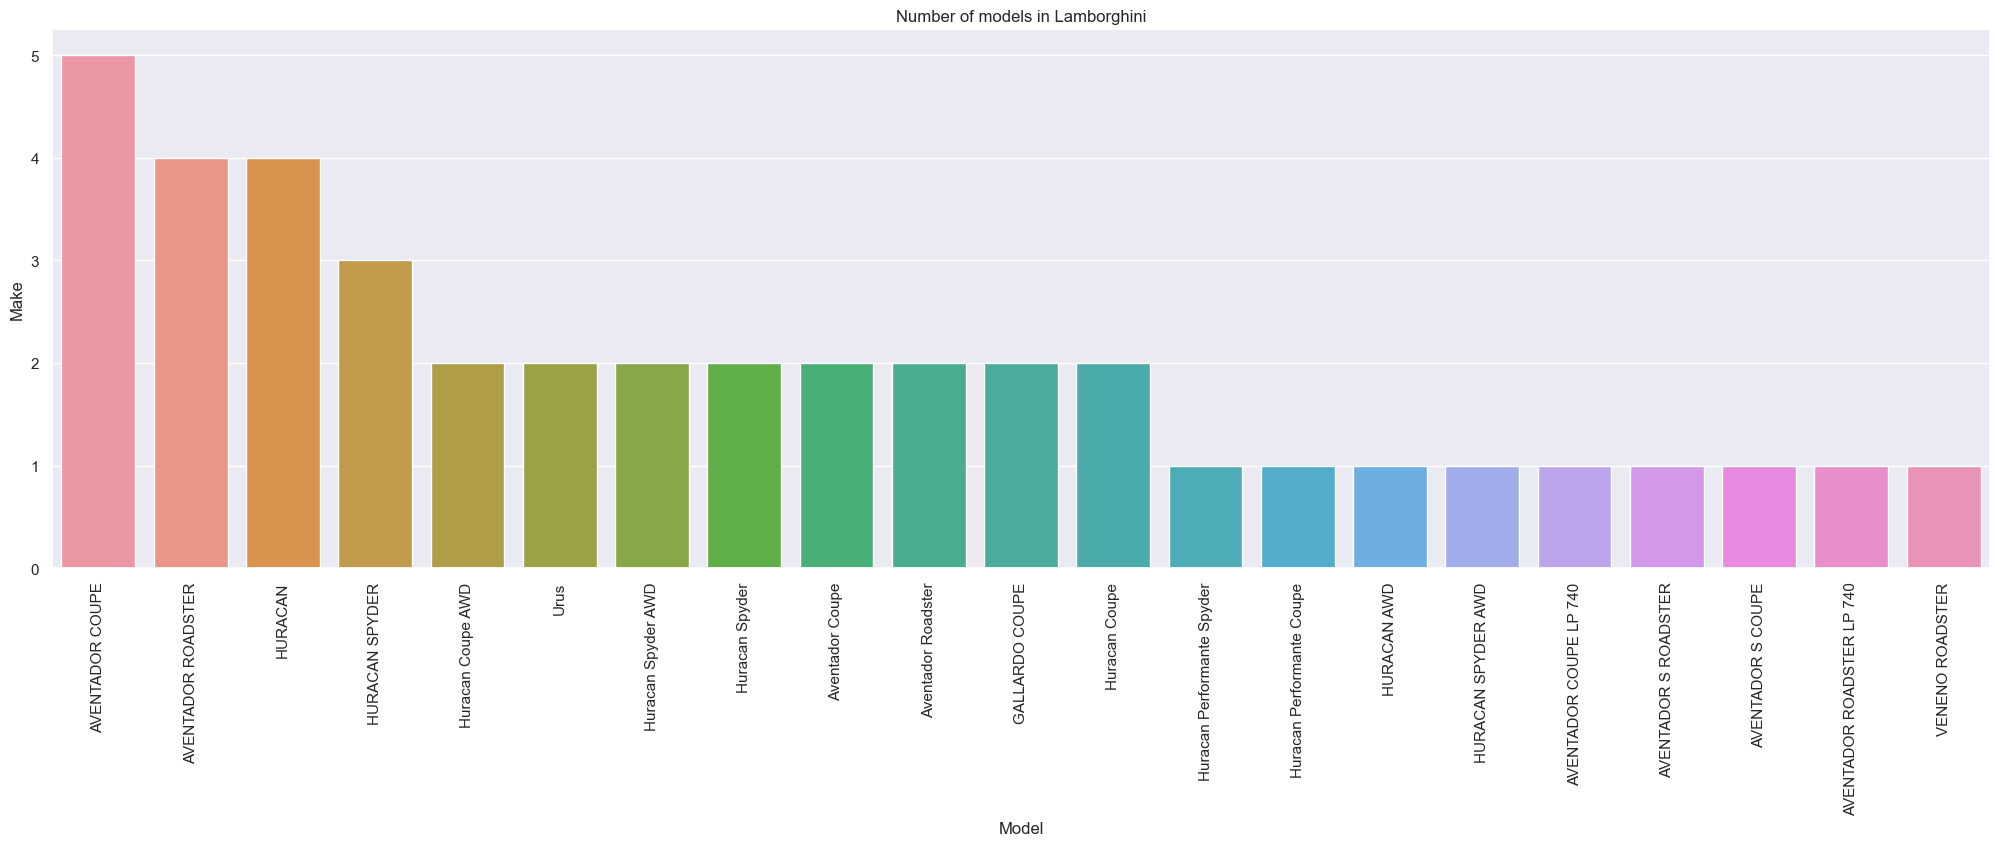

In [20]:
lamborghini = df[df.Make == 'LAMBORGHINI']
lamborghini_models = lamborghini.groupby('Model').count().reset_index().sort_values('Make', ascending=False)
lamborghini_models
f, ax = plt.subplots(figsize=(25,7))
sns.set_theme(style="whitegrid")
ax = sns.barplot(data=lamborghini_models, y='Make',x='Model')
plt.title('Number of models in Lamborghini')
plt.xticks(rotation=90)
plt.show()

# view the median, IQR for various type of vehicles

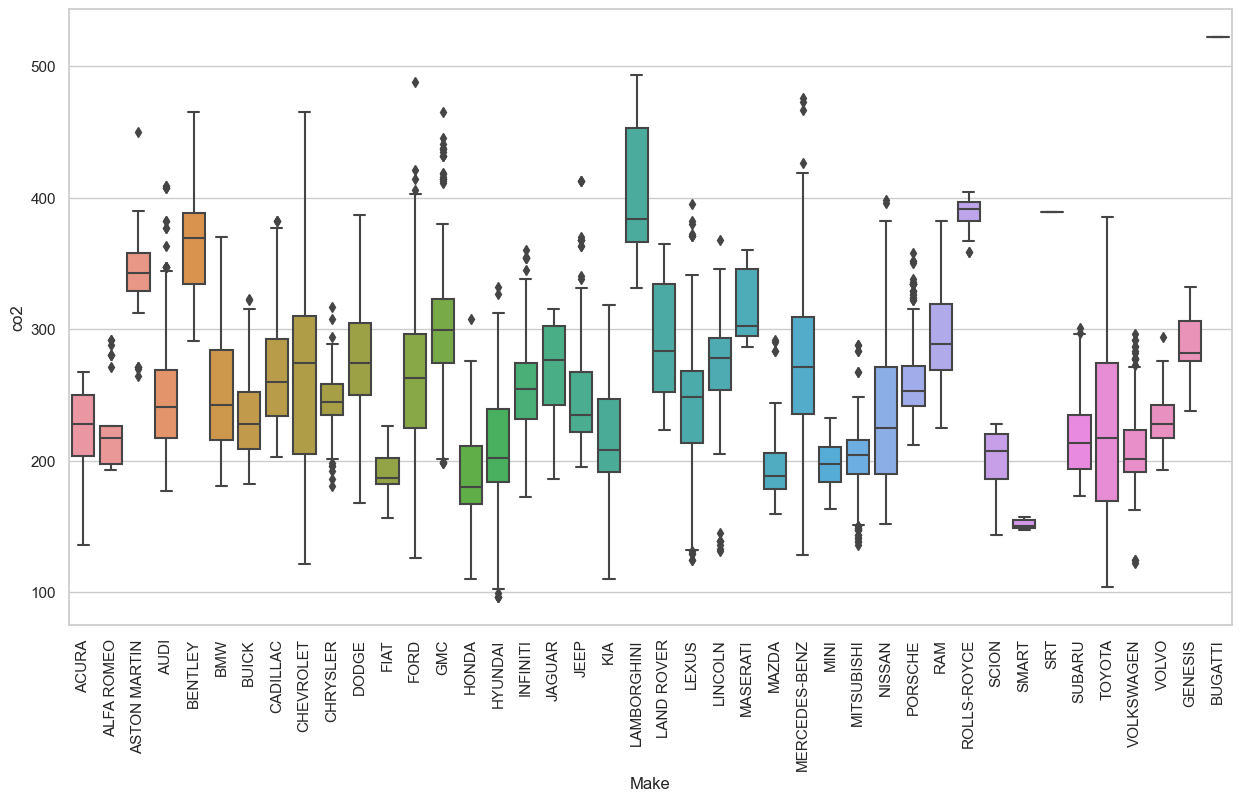

In [21]:
plt.figure(figsize = (15,8))
sns.boxplot(x="Make", y="co2", data=df)
plt.xticks(rotation = 90)
plt.show()

**we could see that all models of Rolls-royce has emissions more than 350. Some models(outliers) in Mercedes-Benz and FORD are competing with the maximum emissions**

In [22]:
df.head()

Make       Model vehicle_class  engine_size  Cylinders Transmission  \
0  ACURA         ILX       COMPACT          2.0          4          AS5   
1  ACURA         ILX       COMPACT          2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT          1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL          3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL          3.5          6          AS6   

  fuel_type  fuel_cons_city  fuel_cons_hwy  fuel_cons_comb  mpgfuel_cons_comb  \
0         Z             9.9            6.7             8.5                 33   
1         Z            11.2            7.7             9.6                 29   
2         Z             6.0            5.8             5.9                 48   
3         Z            12.7            9.1            11.1                 25   
4         Z            12.1            8.7            10.6                 27   

   co2  
0  196  
1  221  
2  136  
3  255  
4  244

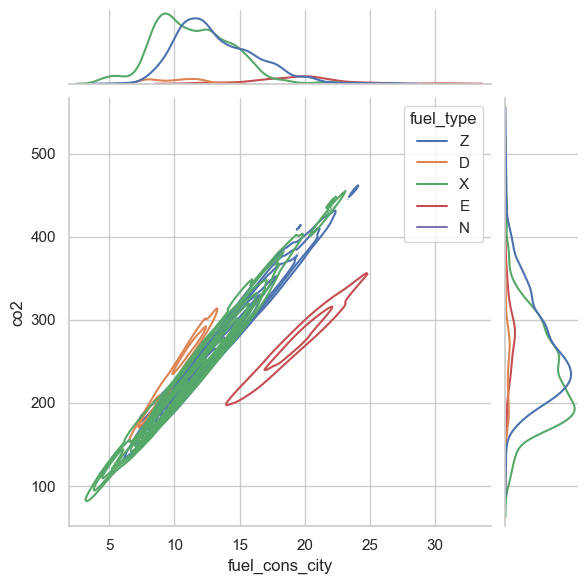

In [23]:
sns.jointplot(
    data=df,
    x="fuel_cons_city", y="co2", hue="fuel_type",
    kind="kde"
)
plt.show()

# Plotting Transmission Distribution

In [24]:
transmission_distr =df['Transmission'].value_counts().reset_index()
fig = px.pie(transmission_distr, values='Transmission', names='index')
fig.update_layout(title="Transmission Distribution")
fig.show()

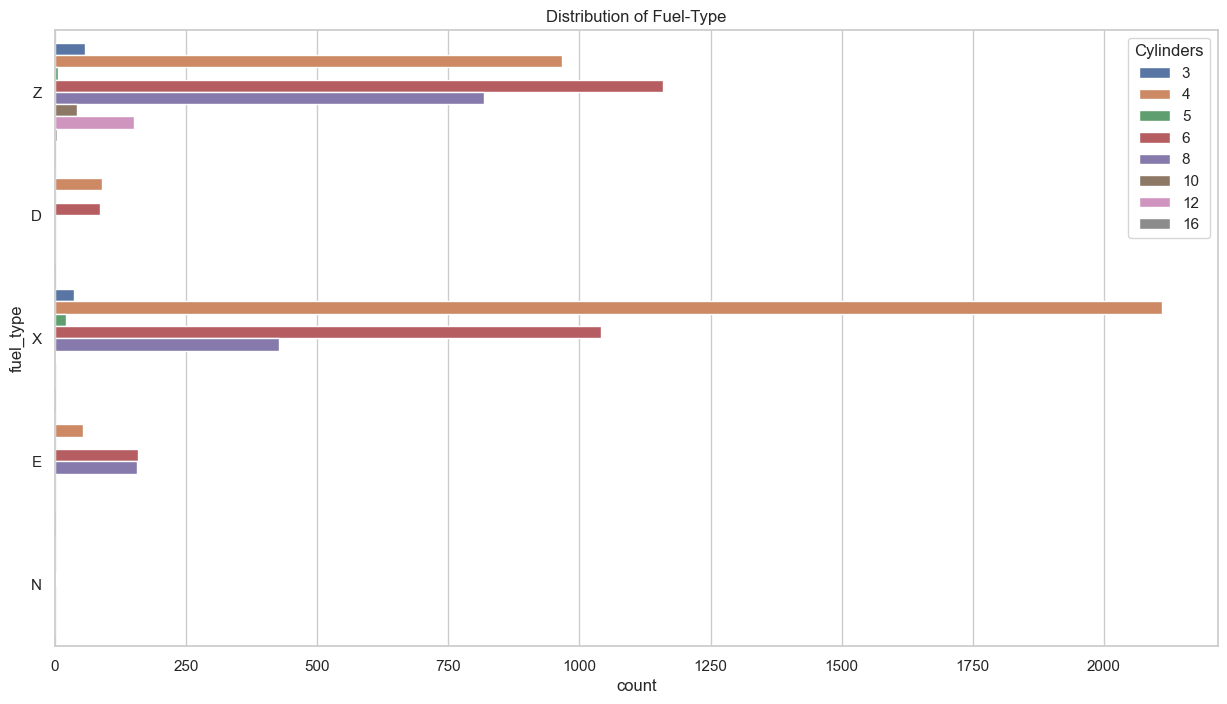

In [25]:
plt.figure(figsize = (15,8))
sns.countplot(y="fuel_type", data=df, hue='Cylinders')
plt.title('Distribution of Fuel-Type')
plt.show()

In [26]:
fig = go.Figure(data=go.Violin(y=df["fuel_cons_city"],
                               box_visible=True,
                               line_color='white',
                               meanline_visible=True,
                               fillcolor='blue', opacity=0.4,
                               x0='Fuel Consumption City'))

fig.show()

In [27]:
df.head(3)

Make       Model vehicle_class  engine_size  Cylinders Transmission  \
0  ACURA         ILX       COMPACT          2.0          4          AS5   
1  ACURA         ILX       COMPACT          2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT          1.5          4          AV7   

  fuel_type  fuel_cons_city  fuel_cons_hwy  fuel_cons_comb  mpgfuel_cons_comb  \
0         Z             9.9            6.7             8.5                 33   
1         Z            11.2            7.7             9.6                 29   
2         Z             6.0            5.8             5.9                 48   

   co2  
0  196  
1  221  
2  136

# Fuel consumption in City and Highway

In [28]:
city=df.fuel_cons_city
highway = df.fuel_cons_hwy
city_hwy_df = df[['fuel_cons_city', 'fuel_cons_hwy', 'fuel_type','co2']]
city_hwy_df.head()

fuel_cons_city  fuel_cons_hwy fuel_type  co2
0             9.9            6.7         Z  196
1            11.2            7.7         Z  221
2             6.0            5.8         Z  136
3            12.7            9.1         Z  255
4            12.1            8.7         Z  244

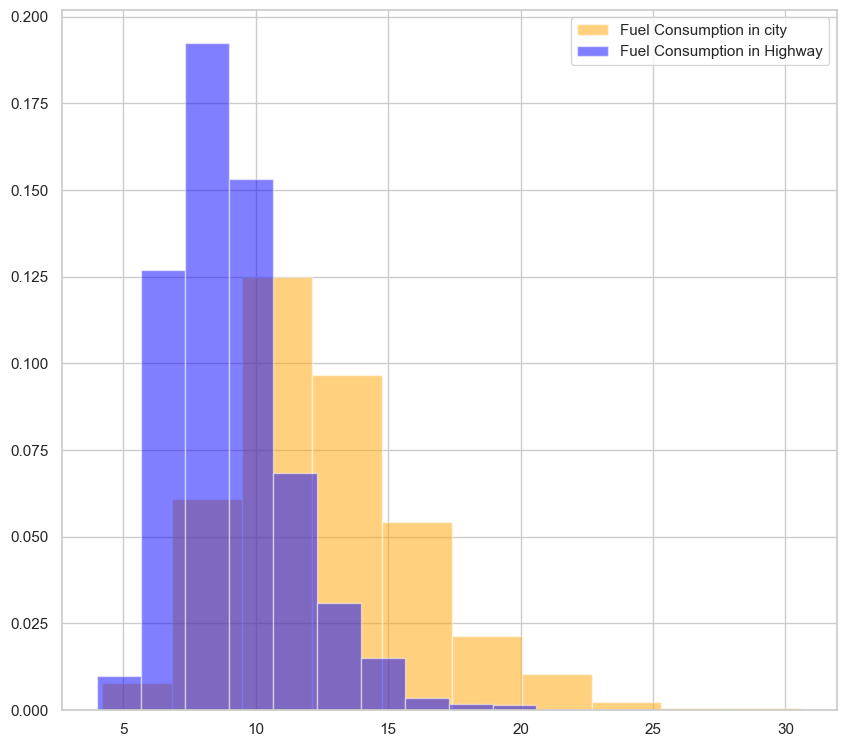

In [29]:
fig = plt.figure(figsize = (10,20))
ax = fig.add_subplot(2,1,1)
ax = plt.hist(city, color="orange", label="Fuel Consumption in city", density=True, alpha=0.5)
ax = plt.hist(highway, color="blue", label="Fuel Consumption in Highway", density=True, alpha=0.5)
ax = plt.legend()
plt.show()

# **Obviously as one would expect, Fuel consumption in Highways are higher**

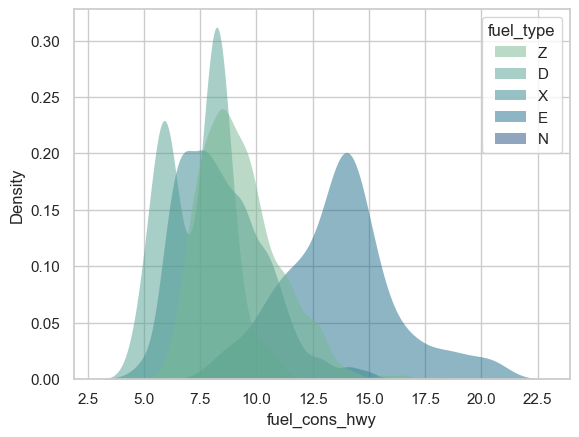

In [31]:
sns.kdeplot(
   data=city_hwy_df, x="fuel_cons_hwy", hue="fuel_type",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
);

# Determine the most used fuel_type which has key role in the co2 emisssions

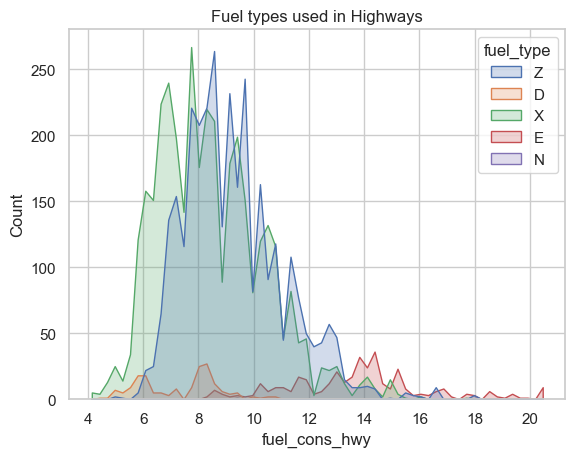

In [32]:
sns.histplot(city_hwy_df, x="fuel_cons_hwy", hue="fuel_type", element="poly")
plt.title('Fuel types used in Highways')
plt.show()

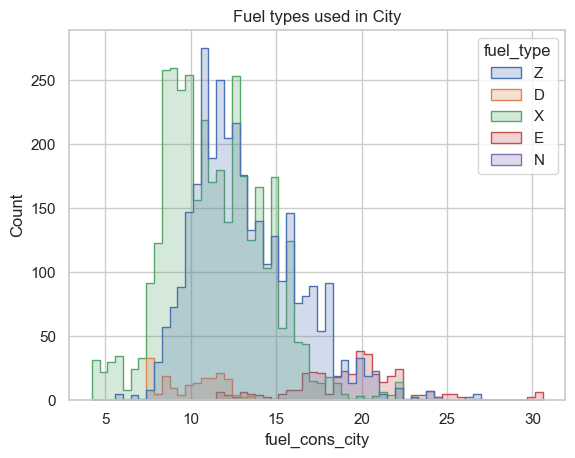

In [33]:
sns.histplot(city_hwy_df, x="fuel_cons_city", hue="fuel_type", element="step")
plt.title('Fuel types used in City')
plt.show()

# Fuel types Z and X are used dominantly both in highways and city which are         "Premium gasoline" and "regular gasoline" 

In [34]:
df.head()

Make       Model vehicle_class  engine_size  Cylinders Transmission  \
0  ACURA         ILX       COMPACT          2.0          4          AS5   
1  ACURA         ILX       COMPACT          2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT          1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL          3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL          3.5          6          AS6   

  fuel_type  fuel_cons_city  fuel_cons_hwy  fuel_cons_comb  mpgfuel_cons_comb  \
0         Z             9.9            6.7             8.5                 33   
1         Z            11.2            7.7             9.6                 29   
2         Z             6.0            5.8             5.9                 48   
3         Z            12.7            9.1            11.1                 25   
4         Z            12.1            8.7            10.6                 27   

   co2  
0  196  
1  221  
2  136  
3  255  
4  244

# Distributions of Combined Fuel consumption in (L/100km)  and mpg

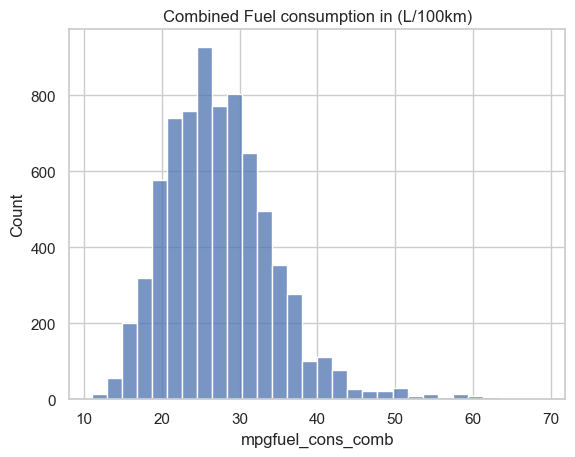

In [35]:
sns.histplot(data=df, x="mpgfuel_cons_comb", bins=30)
plt.title('Combined Fuel consumption in (L/100km)')
plt.show()

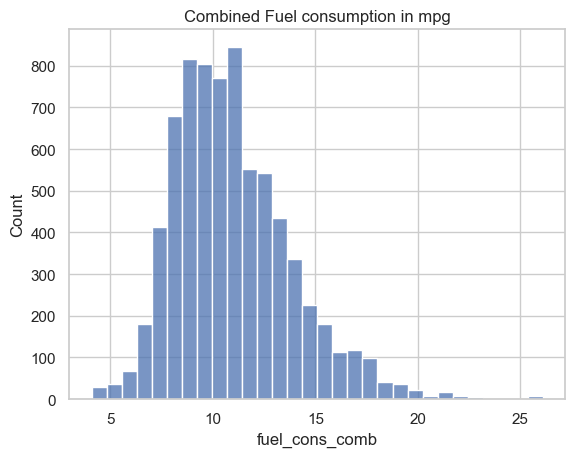

In [36]:
sns.histplot(data=df, x="fuel_cons_comb", bins=30)
plt.title('Combined Fuel consumption in mpg')
plt.show()

# As we see from the histograms, the distribution is near symmetrical and less skewed. SO,we need not apply Log transformations..

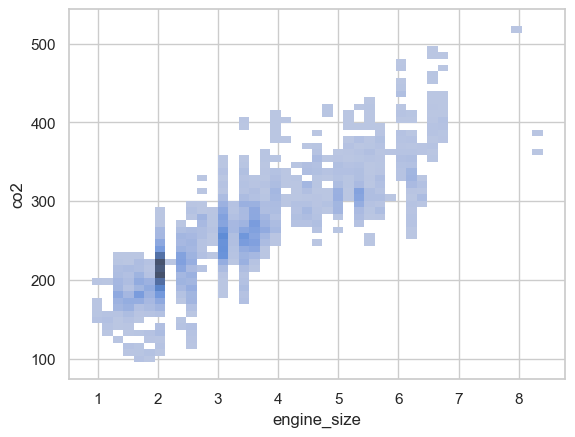

In [38]:
sns.histplot(df, x="engine_size", y="co2");

# Correlations in the data

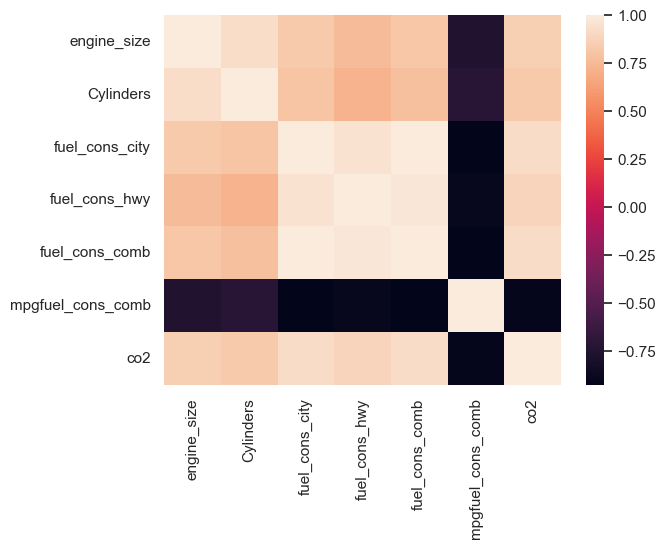

In [40]:
cor = df.corr()
sns.heatmap(cor);

In [ ]:
df.corr()

# Simple Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)

In [42]:
slr = LinearRegression()

In [44]:
y_col = "co2"

X = df.drop(y_col, axis=1)
y = df[y_col]

In [45]:
X = df[['fuel_cons_comb']]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44) #split into train and test parts

In [47]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

In [48]:
slr.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred = slr.predict(X_test_s)

In [49]:
#Accuracy and MSE
print(f'R2 score is {r2_score(y_pred,y_test)}')
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))

R2 score is 0.8284622928787603
Residual sum of squares (MSE): 469.65


# 65% accuracy

# Multiple Linear Regression

In [50]:
mlr = LinearRegression()
X = df[['engine_size', 'Cylinders', 'fuel_cons_comb']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44) #split into train and test parts
X_train_sm = s.fit_transform(X_train)
mlr.fit(X_train_sm, y_train)
X_test_sm = s.transform(X_test)
y_pred_sm = mlr.predict(X_test_sm)

In [51]:
#Accuracy and MSE
print(f'R2 score is {r2_score(y_pred_sm,y_test)}')
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred_sm - y_test) ** 2))

R2 score is 0.8740939333250397
Residual sum of squares (MSE): 372.56


In [52]:
print(f'Co-efficients are {mlr.coef_}')
print(f'Intercept is {mlr.intercept_}')

Co-efficients are [ 7.55482737 12.2582665  37.87258573]
Intercept is 250.63896411645226


# We trained upto 86% accurately predicting model

# Cross-Validation


In [ ]:
from sklearn.model_selection import cross_val_score
Rcross = cross_val_score(slr, X_train_s, y_train, cv=4)
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

**cross validation for multiple linear regr**

In [ ]:
from sklearn.model_selection import cross_val_score
Rcross = cross_val_score(mlr, X_train_sm, y_train, cv=4)
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

# Introduce Polynomial features

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pf = PolynomialFeatures(degree=2, include_bias=False,)
X_pf = pf.fit_transform(X)
X_pf_ss = s.fit_transform(X_pf)

**The polynomial features will make model complex. It is better to use regularization techniques like Lasso, Ridge to see at what point the model overfits and the accuracy starts declining. You would want to stop training your model there**
REferences: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [ ]:
lasso = Lasso()
lasso.fit(X_pf_ss, y)
lasso.coef_ 

In [ ]:
r2_score(y,lasso.predict(X_pf_ss))

# Different alpha values

In [ ]:
las01 = Lasso(alpha = 0.1)
las01.fit(X_pf_ss, y)
print('sum of coefficients:', abs(las01.coef_).sum() )
print('number of coefficients not equal to 0:', (las01.coef_!=0).sum())

In [ ]:
las1 = Lasso(alpha = 1)
las1.fit(X_pf_ss, y)
print('sum of coefficients:',abs(las1.coef_).sum() )
print('number of coefficients not equal to 0:',(las1.coef_!=0).sum())

**conclusion- choose alpha = 1**

# Ridge

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
r = Ridge(alpha = 0.001)
X_train_s = s.fit_transform(X_train)
r.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred_r = r.predict(X_test_s)

# Calculating r2 score
r.coef_

*There are different model evaluation metrics
https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b, we will calculate the metrics given in this blog-post*
1. Mean absolute error - It is the mean of the absolute value of the errors.
2. Mean Squared Error - This is the popular metric and it is the mean of the squared error.
3. RMSE -  This calculates the accuracy of the model.